# classification (logistic regression) 실습

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import tensorflow as tf

np.random.seed(2)

### Sigmoid 함수

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

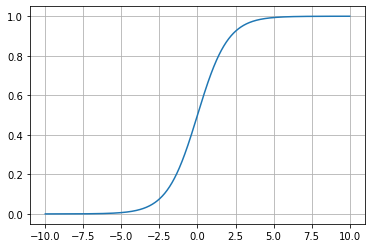

In [ ]:
x = np.linspace(-10, 10, 1000)

plt.grid(True)
plt.plot(x, sigmoid(x))
plt.show()

In [ ]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(-x)+np.exp(x))


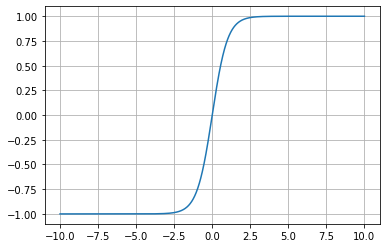

In [ ]:
x = np.linspace(-10, 10, 1000)

plt.grid(True)
plt.plot(x, tanh(x))
plt.show()

## 암 여부 분류

In [ ]:
cancer_data = datasets.load_breast_cancer()

cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
df = pd.DataFrame(data=cancer_data['data'], columns=cancer_data['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df_sd = (df - df.mean()) / (df.std())   # 데이터 표준화
df_sd['target'] = cancer_data['target_names'][cancer_data['target']] # output 추가
df_sd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,malignant
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,malignant
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,malignant
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,malignant
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,malignant


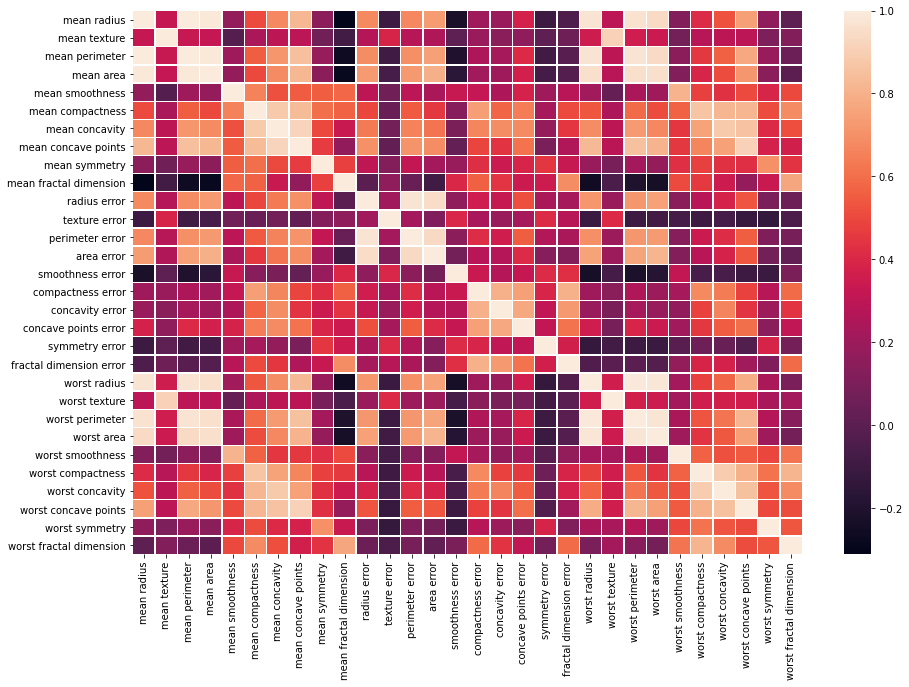

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_sd.corr(), linewidths=.3)
plt.show()

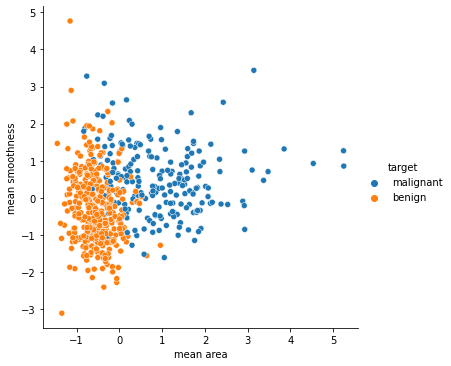

In [ ]:
sns.relplot(x='mean area', y='mean smoothness', hue='target', data=df_sd)

In [ ]:
train_x = df_sd.to_numpy()[:, :-1]
train_y = cancer_data['target']

print(train_x[:1])
print(train_y[:1])
print('target list: ', cancer_data['target_names'])

[[1.096099529431712 -2.071512302244433 1.2688172627037921
  0.983509520104142 1.5670874574786584 3.2806280641246857
  2.650541786383573 2.530248864134298 2.215565541846305 2.253763810728068
  2.487545149236081 -0.5647681226567424 2.830540288788392
  2.4853906751696266 -0.21381351331683507 1.315703887672482
  0.7233896514447262 0.6602390007084622 1.147746771019812
  0.9062856451675908 1.8850309966167498 -1.3580984902594555
  2.3015754798257206 1.9994781593288955 1.3065366565450816
  2.614364658212111 2.107671817557451 2.2940575987078193
  2.7482041142121494 1.9353117420601125]]
[0]
target list:  ['malignant' 'benign']


In [ ]:
def binary_cross_entropy(y, y_hat, epsilon = 1e-12):      # cost function
  predicts = np.clip(y_hat, epsilon, 1. - epsilon)        # [1e-12, 1 - (1e-12)] 사이의 범위 제한
  temp = y * np.log(predicts) + (1 - y) * np.log(1 - predicts)
  return -np.mean(temp)

In [ ]:
# binary_cross_entropy 테스트

a = binary_cross_entropy(np.array([0, 1, 1]), np.array([0.2, 0.4, 0.1]))
b = binary_cross_entropy(np.array([0, 1, 1]), np.array([0.01, 0.99, 0.99]))
print(a, b)

1.1473397920608035 0.01005033585350145


In [ ]:
class LogisticReg:
  def __init__(self, n): # n : feature 개수
    np.random.seed(1)
    self.theta = np.random.random([n + 1, 1])     # with bias

  def __call__(self, x):
    return sigmoid(x @ self.theta) 

  def train_model(self, lr, input_x, input_y, epochs):
    cost_list = []

    for _ in range(epochs):
      # cost 계산
      predicted_y = self(input_x)
      cost = binary_cross_entropy(input_y.reshape(-1, 1), predicted_y)
      
      # gradients 계산
      grad_theta = np.mean((predicted_y - input_y.reshape(-1, 1)) * input_x, axis=0)
      cost_list.append(cost)

      self.theta -= lr * grad_theta.reshape(-1, 1)
      
    plt.plot(range(len(cost_list)), cost_list)
    plt.xlabel('epoch')
    plt.ylabel('cost value')
    plt.title('Training')
    plt.show()

In [ ]:
# 학습 데이터 수정
train_x_with_one = np.hstack((np.ones((len(train_x), 1)), train_x))
train_x_with_one = train_x_with_one.astype(float)
train_x_with_one[: 1]

array([[ 1.        ,  1.09609953, -2.0715123 ,  1.26881726,  0.98350952,
         1.56708746,  3.28062806,  2.65054179,  2.53024886,  2.21556554,
         2.25376381,  2.48754515, -0.56476812,  2.83054029,  2.48539068,
        -0.21381351,  1.31570389,  0.72338965,  0.660239  ,  1.14774677,
         0.90628565,  1.885031  , -1.35809849,  2.30157548,  1.99947816,
         1.30653666,  2.61436466,  2.10767182,  2.2940576 ,  2.74820411,
         1.93531174]])

In [ ]:
t = np.array([[1,2],[4,5],[7,8]])
z = np.array([[2],[3],[4]])

print(t * z)

print((t * z).mean(axis=0))

[[ 2  4]
 [12 15]
 [28 32]]
[14. 17.]


In [ ]:
# gradients 계산
logsitic_model = LogisticReg(len(train_x[0])) # 모델 생성

predicted_y = logsitic_model(train_x_with_one)
grad_theta = np.mean((predicted_y - train_y.reshape(-1, 1)) * train_x_with_one, axis=0)
print(grad_theta, len(grad_theta))

[-0.21225557  0.64605973  0.35327215  0.66387628  0.63206383  0.40154186
  0.63469754  0.70153676  0.74705254  0.39006402  0.11812085  0.54346534
  0.03141069  0.53932152  0.51022567  0.03292304  0.40121623  0.34857968
  0.47850472  0.07110122  0.22433933  0.68944603  0.38091344  0.70186999
  0.65622372  0.42973873  0.59757438  0.65520014  0.75135206  0.4076182
  0.38393526] 31


In [ ]:
from sklearn.model_selection import train_test_split

# 학습과 테스트 데이터를 나눔
xtrain, xtest, ytrain, ytest = \
      train_test_split(train_x_with_one, train_y, random_state=72, test_size=0.2)

In [ ]:
len(xtrain), len(xtest)

(455, 114)

In [ ]:
logsitic_model = LogisticReg(len(train_x[0])) # 모델 생성

# 정확도 측정
prediction = logsitic_model(xtest).reshape(-1) > 0.5
accuracy = (np.sum(prediction.reshape(-1) == ytest))/(len(prediction))

print('정확도 : {:.3f} %'.format(accuracy * 100.0))

정확도 : 11.404 %


In [ ]:
ytest

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1])

In [ ]:
logsitic_model.theta.shape

(31, 1)

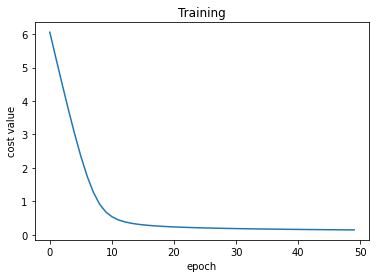

In [ ]:
logsitic_model = LogisticReg(len(train_x[0]))
learning_rate = 0.1

logsitic_model.train_model(learning_rate, xtrain, ytrain, 50)

In [ ]:
binary_cross_entropy(ytest, logsitic_model(xtest))


1.808714476446218

In [ ]:
# 정확도 측정
prediction = logsitic_model(xtest).reshape(-1) > 0.5
accuracy = (np.sum(prediction.reshape(-1) == ytest))/(len(prediction))

print('정확도 : {:.3f} %'.format(accuracy * 100.0))

정확도 : 92.105 %


## sklearn 을 이용한 Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)

y_pred = log_reg.predict(xtest)
print(y_pred)

[1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1
 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 0 0 1]


In [ ]:
prediction = log_reg.predict(xtest).reshape(-1) > 0.5
accuracy = (np.sum(prediction.reshape(-1) == ytest))/(len(prediction))

print('정확도 : {:.3f} %'.format(accuracy * 100.0))

정확도 : 96.491 %


In [ ]:
log_reg.score(xtest, ytest)

0.9649122807017544

## TensorFlow 를 이용한 Classification

In [ ]:
import tensorflow as tf

In [ ]:
tf_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(len(xtrain[0])), name="cancer_data"),
        tf.keras.layers.Dense(1, activation="sigmoid", name="layer1", 
                              use_bias=False)
    ]
)

In [ ]:
tf_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 정확도 측정
prediction = tf_model.predict(xtest).reshape(-1) > 0.5
accuracy = (np.sum(prediction == ytest))/(len(prediction))

print('정확도 : {:.3f} %'.format(accuracy * 100.0))

정확도 : 92.105 %


In [ ]:
tf_model.compile(
    optimizer=tf.keras.optimizers.SGD(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

In [ ]:
history = tf_model.fit(
    xtrain,
    ytrain,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(xtest, ytest),
)

Epoch 1/10
15/15 [==============================] - 0s 12ms/step - loss: 0.9539 - binary_accuracy: 0.2677 - val_loss: 0.7873 - val_binary_accuracy: 0.5614
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7015 - binary_accuracy: 0.5967 - val_loss: 0.6290 - val_binary_accuracy: 0.7632
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5214 - binary_accuracy: 0.8044 - val_loss: 0.5396 - val_binary_accuracy: 0.7895
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4241 - binary_accuracy: 0.8822 - val_loss: 0.4823 - val_binary_accuracy: 0.8333
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.4038 - binary_accuracy: 0.8793 - val_loss: 0.4408 - val_binary_accuracy: 0.8509
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3537 - binary_accuracy: 0.8998 - val_loss: 0.4084 - val_binary_accuracy: 0.8772
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3

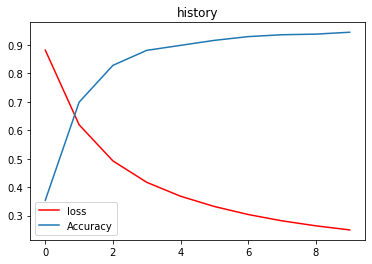

In [ ]:
plt.title('history')
plt.plot(range(10), history.history['loss'], 'r', label='loss')
plt.plot(range(10), history.history['binary_accuracy'], label='Accuracy')
plt.legend()
plt.show()


In [ ]:
# 정확도 측정
prediction = tf_model.predict(xtest).reshape(-1) > 0.5
accuracy = (np.sum(prediction.reshape(-1) == ytest))/(len(prediction))

print('정확도 : {:.3f} %'.format(accuracy * 100.0))

정확도 : 92.105 %


## Multi-class classification


In [ ]:
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data=iris_data['data'], columns=iris_data['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
input_data = iris_df.to_numpy()
input_data = np.hstack((np.ones((len(input_data), 1)), input_data))   # bias (x_0) 추가

input_data[: 5]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2]])

In [ ]:
target = iris_data['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
train_iris_x, test_iris_x, train_iris_y, test_iris_y = train_test_split(input_data, target, test_size=0.2)
len(train_iris_x), len(test_iris_x)

(120, 30)

In [ ]:
train_iris_x.shape

(120, 5)

In [ ]:
input_size = train_iris_x.shape[1] - 1
lg_models = [LogisticReg(input_size), LogisticReg(input_size), LogisticReg(input_size)]

In [ ]:
predictions = []
for i in range(3):
  predictions.append(np.array(lg_models[i](test_iris_x)))
predictions = np.array(predictions)

results = np.argmax(predictions, axis=0) == test_iris_y.reshape(-1, 1)
accuracy = np.sum(results)/len(results)
print('정확도 : {:.3f} %'.format(accuracy * 100.0))

정확도 : 30.000 %


In [ ]:
train_iris_y

array([0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2,
       0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 2])

In [ ]:
train_iris_multi_y = []

# 'setosa' (0), 'versicolor' (1), 'virginica' (2)
for i in range(3):      # i label 에 대하여 1 나머지는 0으로 설정
  train_iris_multi_y.append(np.where(train_iris_y == i, 1, 0))  

train_iris_multi_y

[array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0]),
 array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 

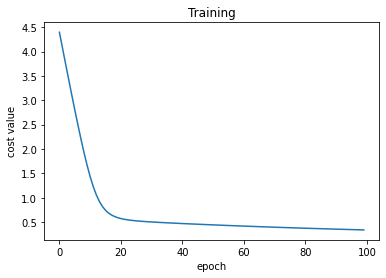

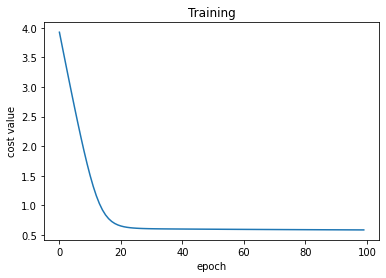

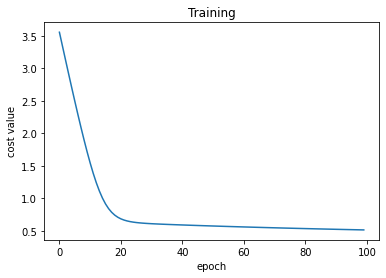

In [ ]:
learning_rate = 0.01
lg_models = [LogisticReg(input_size), LogisticReg(input_size), LogisticReg(input_size)]

for i in range(3):
  lg_models[i].train_model(learning_rate, train_iris_x, train_iris_multi_y[i], 100)

In [ ]:
predictions = []
for i in range(3):
  predictions.append(np.array(lg_models[i](test_iris_x)))
predictions = np.array(predictions)

results = np.argmax(predictions, axis=0) == test_iris_y.reshape(-1, 1)
accuracy = np.sum(results)/len(results)
print('정확도 : {:.3f} %'.format(accuracy * 100.0))

정확도 : 63.333 %


## 카이 제곱 검정

* 두 **범주형 변수**에 따른 비율 차이를 검증하는 것
  * 두 **연속형 변수** 간 관계 측정은 상관 계수
* 카이 제곱 검정은 두 변수가 독립적인지 아닌지만을 알 수 있을 뿐이고, 구체적으로 어떤 관계가 있는지는 알 수 없음

검증하고자 하는 가설
* 영가설(귀무가설): 분할표의 행과 열은 독립적이다
* 대안가설: 분할표의 행과 열은 독립적이지 않다


#### 예시) 체중과 당뇨와의 관계 분석
![images](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FlEmOL%2FbtqEnIM9x5F%2FJypsQJ9ji97wCpgIfPeH2k%2Fimg.png)

In [ ]:
import scipy.stats as stats

sample_data = pd.DataFrame([[16, 24],[18, 42]], columns=['비만', '정상체중'], index=['당뇨', '정상'])
sample_data

,비만,정상체중
당뇨,16,24
정상,18,42


$$
\chi^{2}=\sum_{i=1}^{n} \frac{\left(o_{i}-e_{i}\right)^2}{e_{i}}
$$

영가설을 전제하에 기대값 계산

![images](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FAihTa%2FbtqEnHurHWi%2FRWzE1IB5k3hcMUeZpRxERk%2Fimg.png)

In [ ]:
chi_val, p_val, dgf, exp_val = stats.chi2_contingency(observed= sample_data)

print('Chi Square 값', chi_val)
print('P 값', p_val)
print('Degree of Freedom', dgf)
print('Expected Value\n', pd.DataFrame(exp_val), sep='')

Chi Square 값 0.6703060011883536
P 값 0.41294494144770166
Degree of Freedom 1
Expected Value
      0     1
0  13.6  26.4
1  20.4  39.6


p-value 가 유의 수준(0.05)보다 높으므로, 영가설을 기각하지 않음.
즉, 당뇨와 체중 사이의 관계는 없다(독립적이다) 라고 말할 수 있음.

In [ ]:
print(stats.chi2.ppf(1 - 0.05, df=dgf))  # q는 lower tail probability

# 카이 제곱 값 3.84인 현상이 관찰될 가능성이 0.05 % 라는 이야기 (p-value 가 작아질록, chi-squares 값은 커짐)

3.841458820694124



![images](https://www.statsandr.com/blog/chi-square-test-of-independence-by-hand_files/Screenshot%202020-01-28%20at%2000.56.28.png)

![images](https://mblogthumb-phinf.pstatic.net/MjAxOTA4MzFfMyAg/MDAxNTY3MjQ5MjIxODEw.ZluhI7QczvZ_6rb85sXqoaDa31P6cvnI1ol-Y3jRQ6kg.UQnOi2dDWUewc90-Sj9Gx30WD5lHNI4SHSsyXN1BOpkg.PNG.ollehw/image.png?type=w800)
